# <center> System of Billiard  Balls </center>
##  <center> Event Based Algorithm </center>


### <center> Python Code </center>


#### In the cell below i am gonna plot the configuration of N disk at different instant

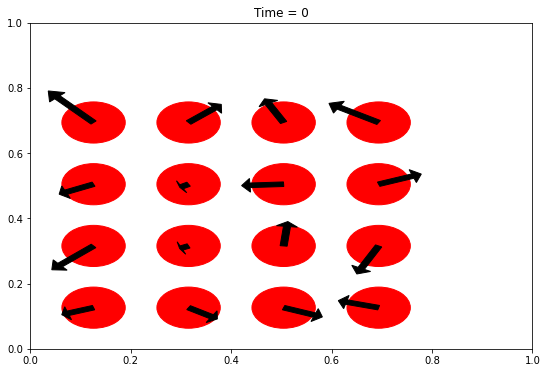

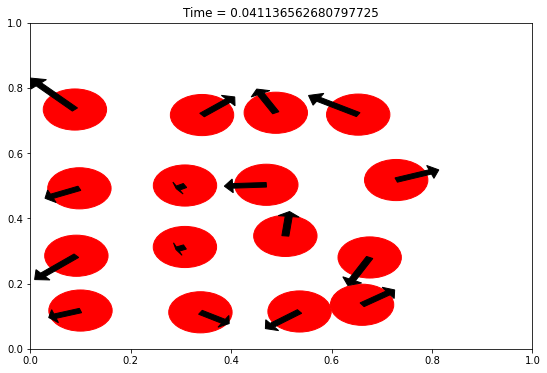

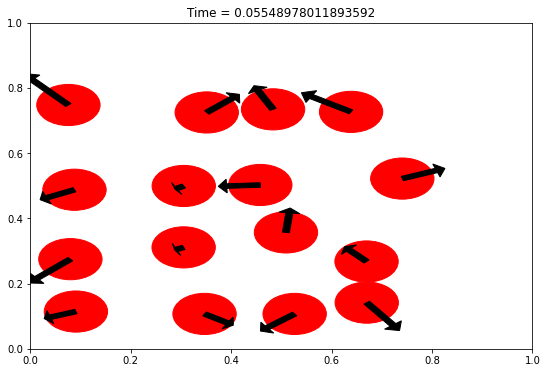

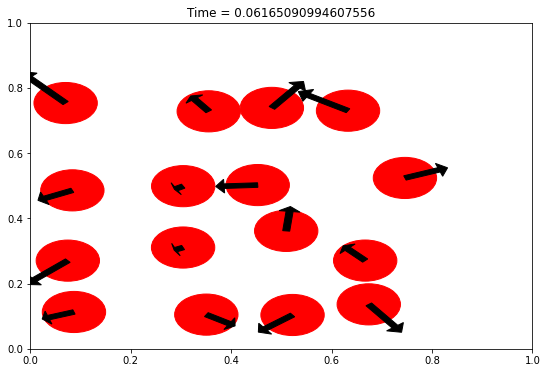

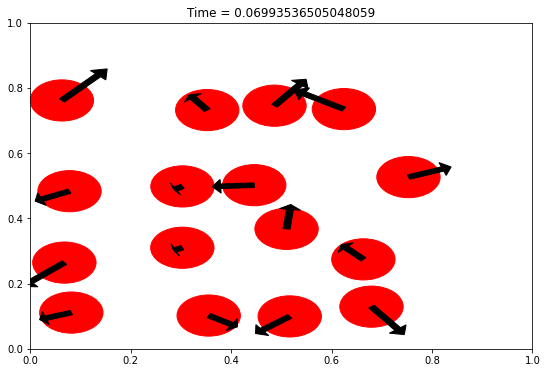

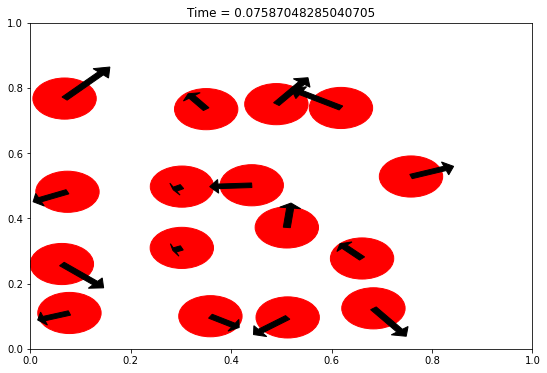

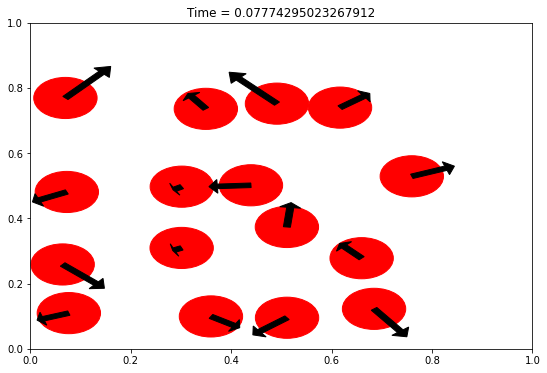

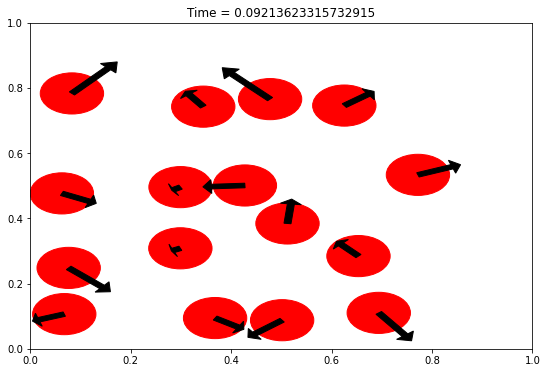

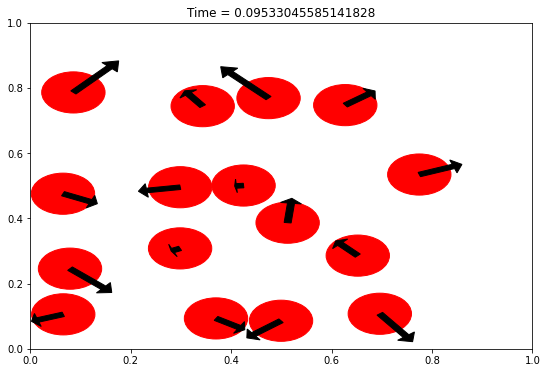

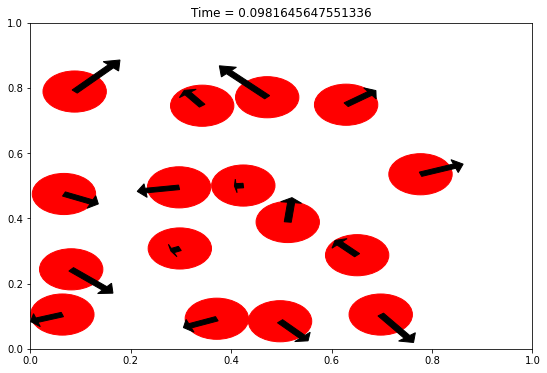

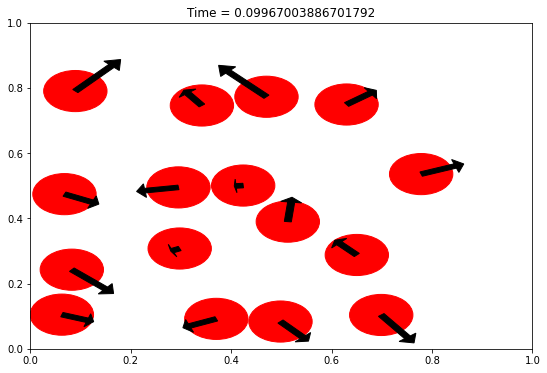

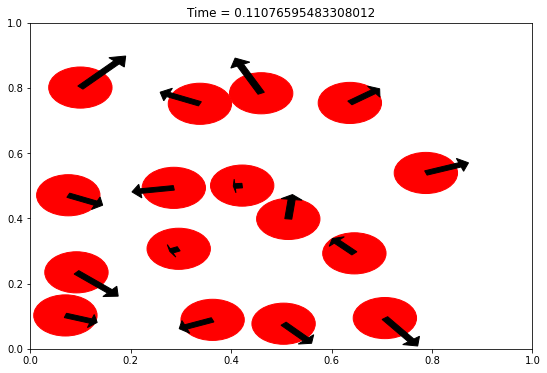

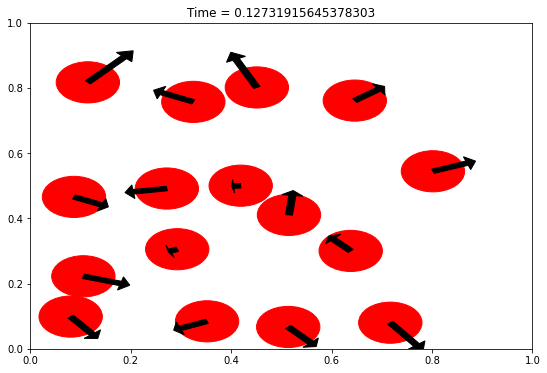

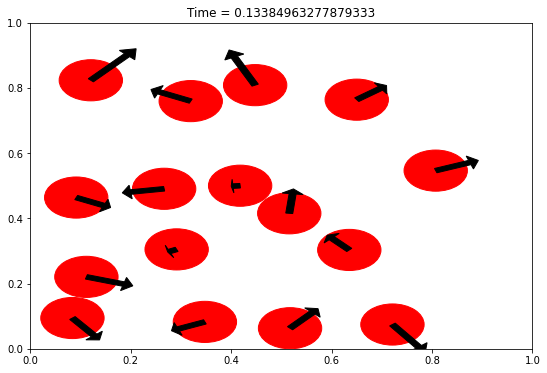

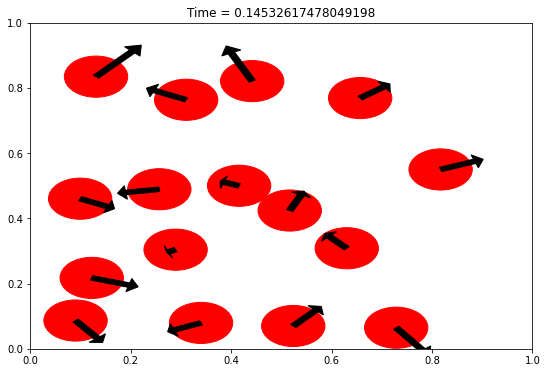

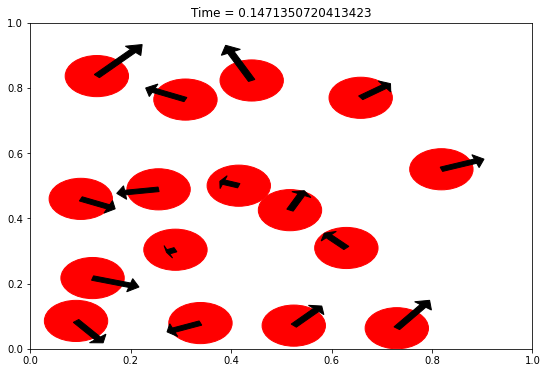

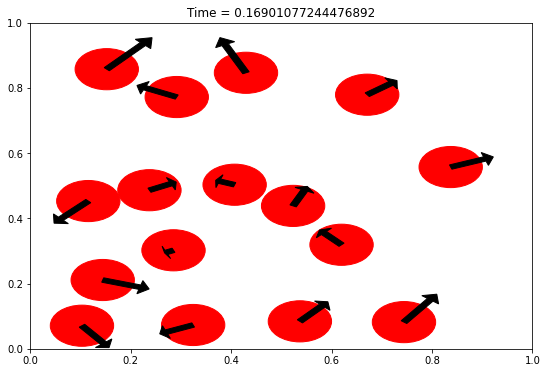

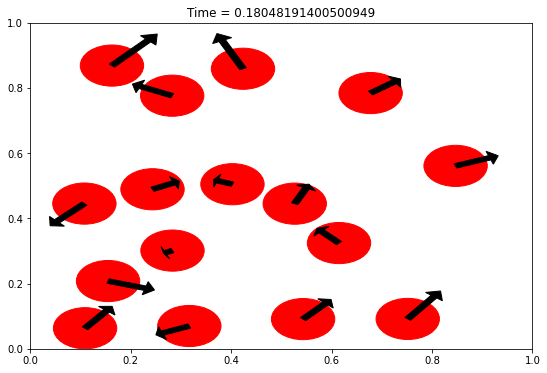

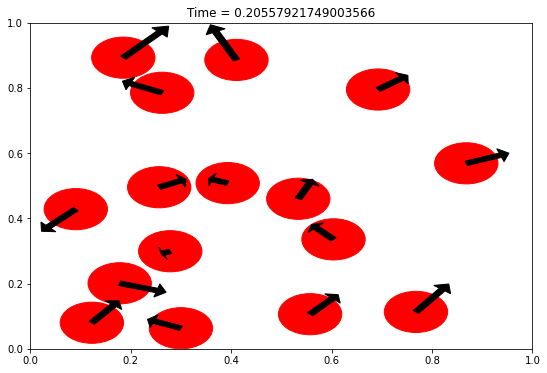

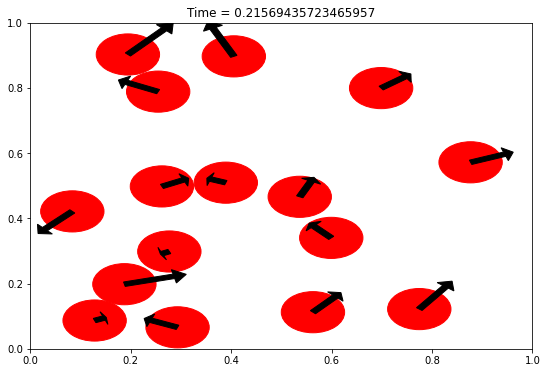

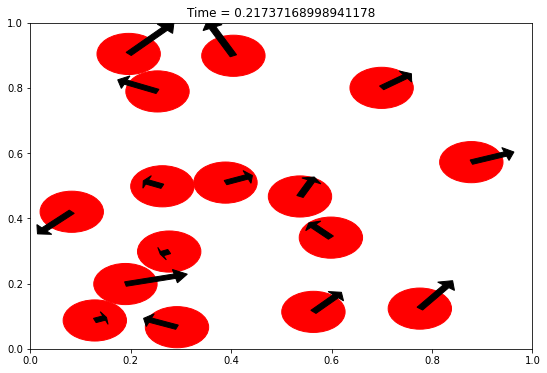

In [1]:
############## Event-DRIVEN COLLISIONS ####################################
###########################################################################

#### This Program simulates the motion of four atoms in a 2D box ######
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt







#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad,L_box):  
    if velcomp > 0.0:
        del_t = (L_box - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of atoms to collide. 
# pos1 and pos2 are positions of atoms 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the atoms. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


##########################################################################


######################### Initialization #################################


N = 4  ## we will take N*N atoms  
Natoms = 16
spac = 3 ##adjusting spacebetween disks so they don't overlap or touch the wall
rho = 0.2
velocities = np.random.uniform(low = -1.0,high = 1.0 ,size = (N*N,2))
L_box= 1

Ratom = np.sqrt((rho*L_box*L_box)/(Natoms*np.pi))  ##calculating radius of atoms


##creatiing position lattice
pos = np.array([],dtype = float)
for i in range(0,N):
    for j in range(0,N):

        pos = np.append(pos,((2+i*spac)*Ratom,(2+j*spac)*Ratom))

positions = pos.reshape(Natoms,2) 

##i am separately collecting x and y coordinate of each disk
## i will use them in simulation part
X_coordinate = np.array(positions[:,0]) 
Y_coordinate = np.array(positions[:,1])

#####################33

##creating figure and arrows

fig1a,ax = plt.subplots(figsize = (9,6))
ax.set_xlim([0,L_box])
ax.set_ylim([0,L_box])
t = 0##initial time
ax.set_title("Time = "+str(t))

for x,y in positions:
    PP = pt.Circle((x,y),radius = Ratom,color = 'r')
    ax.add_patch(PP)
for i in range(N*N):
    QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.07,color = 'k')
    ax.add_patch(QQ)
plt.show()

######################################33



n_events = 20 # selecting number of events you can change it also
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] ##tabulating all pair possible







############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  ##findig minimum of all time

    for i in range(Natoms):
        positions[i] += velocities[i]*abs(next_iter) # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    t+=next_iter
    ##plotting configurations at different instant
    fig,ax = plt.subplots(figsize = (9,6))
    ax.set_xlim([0,L_box])
    ax.set_ylim([0,L_box])
    ax.set_title("Time = "+str(t))
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'r')
        ax.add_patch(PP)

    for i in range(N*N):
        QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.07,color = 'k')
        ax.add_patch(QQ)
    plt.show()
    
    X_coordinate = np.vstack((X_coordinate, positions[:,0])) ##stacking new x and y coordinates
    Y_coordinate = np.vstack((Y_coordinate, positions[:,1]))
    ####################






## <center> Simulation Part </center>

In [2]:
import ipyvolume as ipv  ##library forrendering 3d figures
ipv.figure()
ipv.clear()
  
Z = np.zeros(N*N)
s = ipv.scatter(X_coordinate, Y_coordinate, Z, marker='sphere', size=200*Ratom,color = 'red')
ipv.animation_control(s,interval = 500) # shows controls for animation controls
ipv.show()